C:\Users\SHYAM\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [11:01:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9476429939792008
Precision: 0.9967730913784595
Recall: 0.8981937602627258
F1 Score: 0.9449192953412628

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     29232
           1       1.00      0.90      0.94     29232

    accuracy                           0.95     58464
   macro avg       0.95      0.95      0.95     58464
weighted avg       0.95      0.95      0.95     58464


Confusion Matrix:
 [[29147    85]
 [ 2976 26256]]


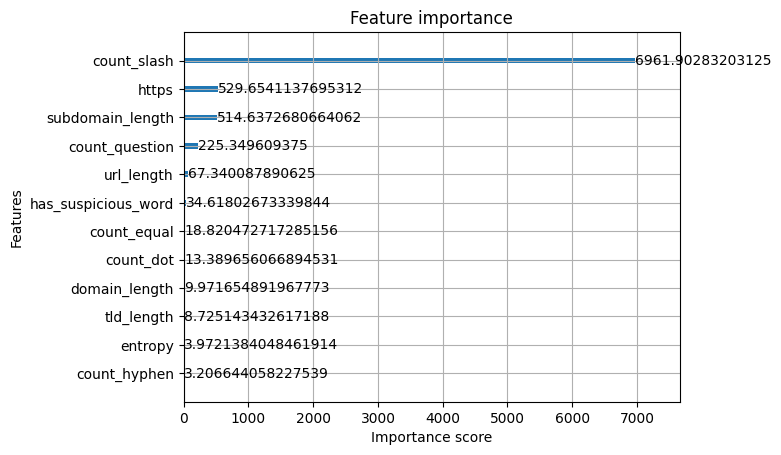

In [2]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load dataset
# Example: df = pd.read_csv("final_dataset.csv")
df = pd.read_csv(r"D:\final year project\url_features_dataset.csv")

# Features (all except label column)
X = df.drop("label", axis=1)   # assuming your target column is "label"
y = df["label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize XGBoost Classifier
model = xgb.XGBClassifier(
    objective="binary:logistic",  # binary classification
    eval_metric="logloss",
    use_label_encoder=False,
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance
import matplotlib.pyplot as plt
xgb.plot_importance(model, max_num_features=15, importance_type="gain")
plt.show()


In [4]:
import xgboost as xgb

# Save model to file
model_filename = "xgb_url_model.json"
model.save_model(model_filename)
print("Model saved to", model_filename)

Model saved to xgb_url_model.json
